In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv("E:\liu\lab\lab2\Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [5]:
df.shape

(2000, 8)

In [6]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [7]:
df.loc[df['Profession'].isnull()]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
79,80,Female,49,98000,42,NaN,1,1
118,119,Female,51,84000,43,NaN,2,7
219,220,Female,59,76000,61,NaN,9,1
237,238,Male,95,36000,35,NaN,0,4
437,438,Male,76,136259,14,NaN,0,7
440,441,Female,0,57373,29,NaN,0,7
498,499,Male,95,121725,3,NaN,12,3
545,546,Female,89,107359,26,NaN,10,6
601,602,Male,61,126370,20,NaN,11,4
641,642,Male,66,121377,19,NaN,7,7


In [12]:
df.dropna(axis=0, how='any',inplace=True)

None


In [13]:
df.shape

(1965, 8)

In [15]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [29]:
ohe = OneHotEncoder()
gender_ohe = ohe.fit_transform(df[['Gender']])
gender_ohe

<1965x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1965 stored elements in Compressed Sparse Row format>

In [30]:
gender_ohe.todense()

matrix([[0., 1.],
        [0., 1.],
        [1., 0.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]])

In [32]:
pro_ohe = ohe.fit_transform(df[['Profession']])
pro_ohe.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
def diagnostic_plots(data, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    data[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)
    plt.show()

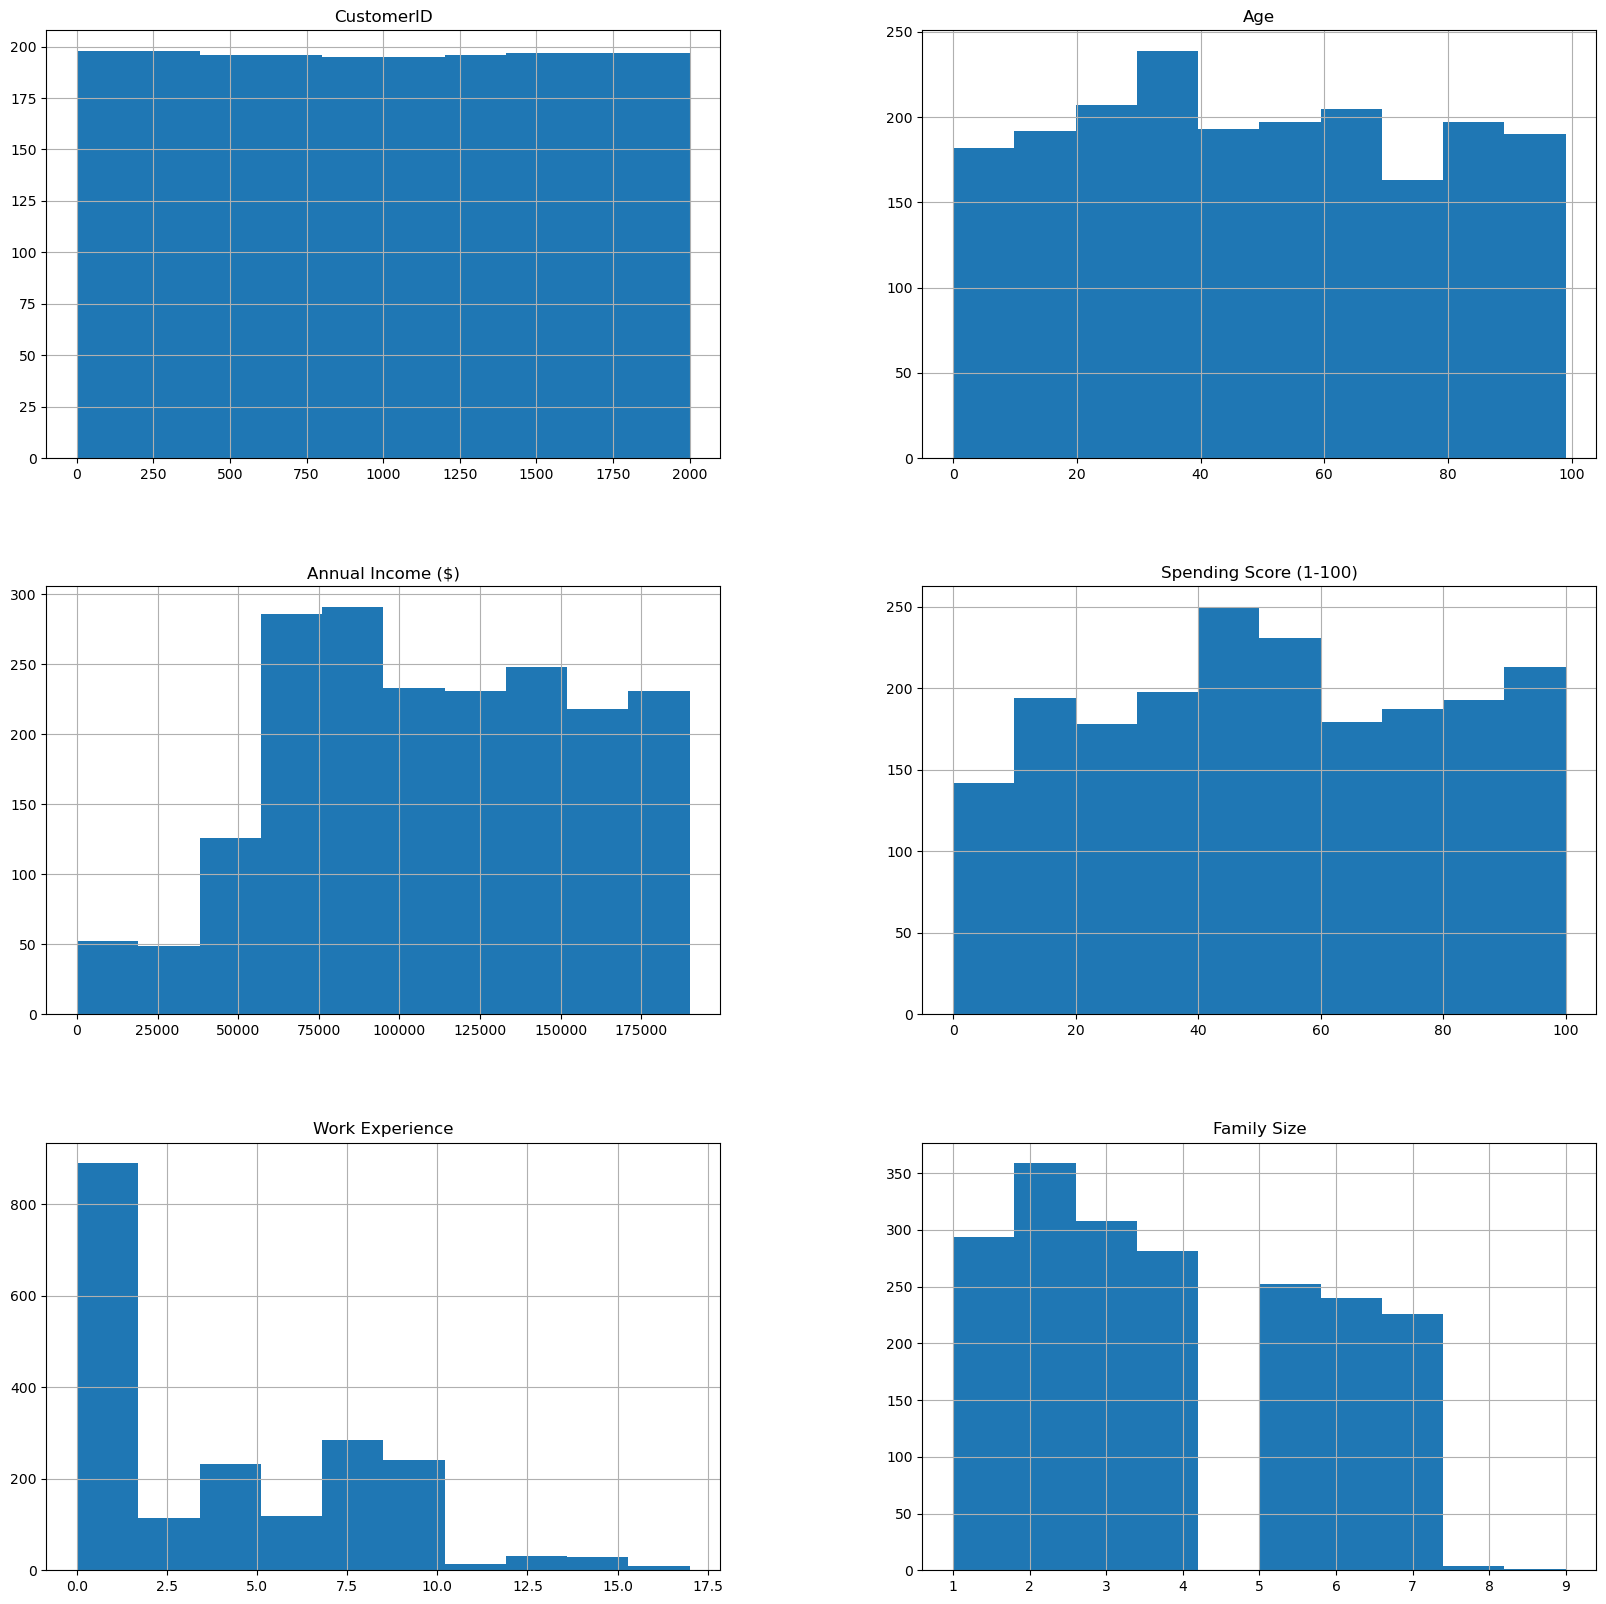

In [33]:
df.hist(figsize=(20,20))
plt.show()

In [22]:
index = df[df["Spending Score (1-100)"] == 0 ].index
df.drop(index, axis = 0, inplace=True)

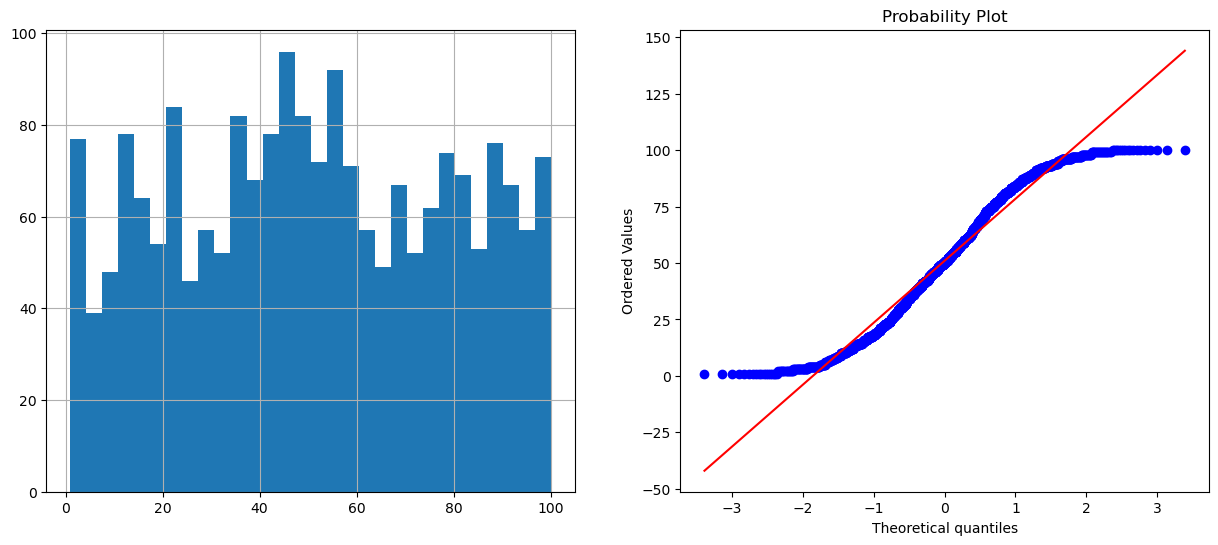

In [23]:
diagnostic_plots(df, 'Spending Score (1-100)')

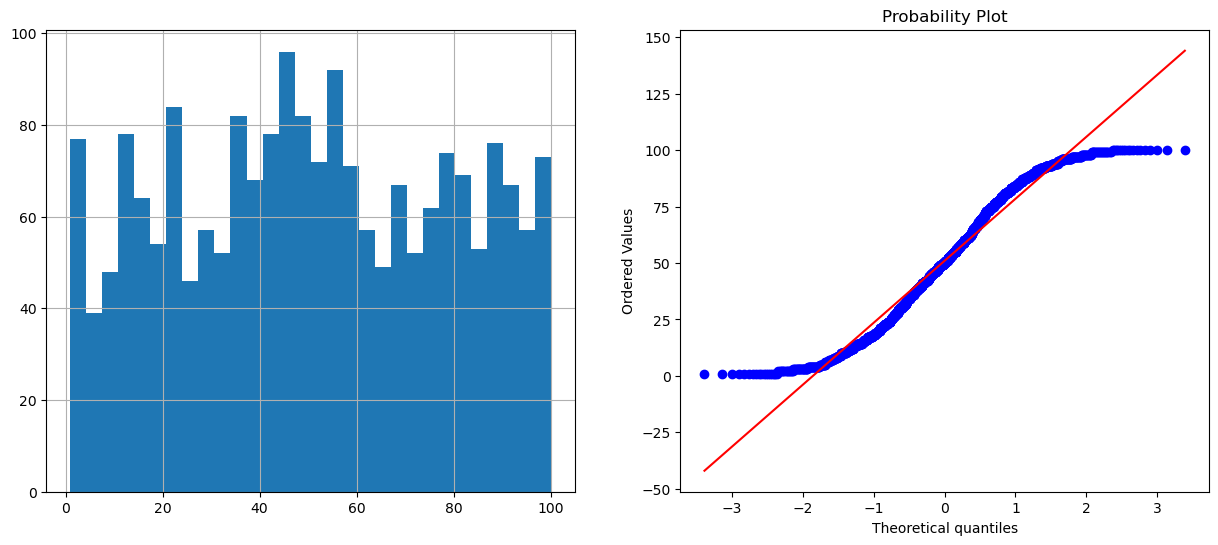

In [24]:
df['Spending Score (1-100)_log'] = np.log(df['Spending Score (1-100)'])
diagnostic_plots(df, 'Spending Score (1-100)')

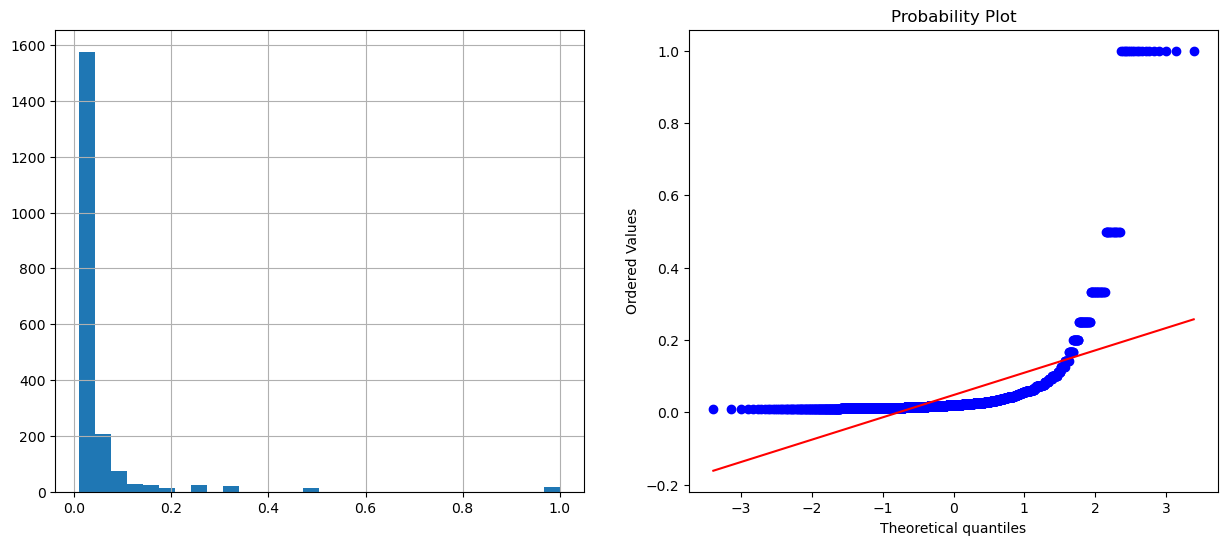

In [25]:
df['Spending Score (1-100)_reciprocal'] = 1 / (df['Spending Score (1-100)']+1e-5) 
diagnostic_plots(df, 'Spending Score (1-100)_reciprocal')

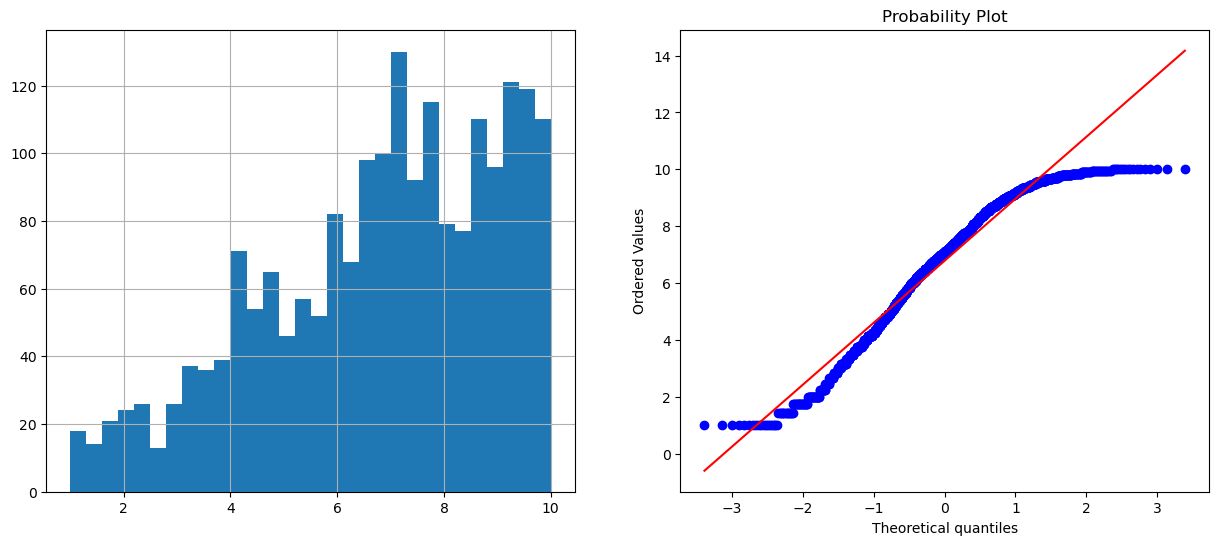

In [26]:
df['Spending Score (1-100)_sqr'] = df['Spending Score (1-100)']**(1/2) 
diagnostic_plots(df, 'Spending Score (1-100)_sqr')

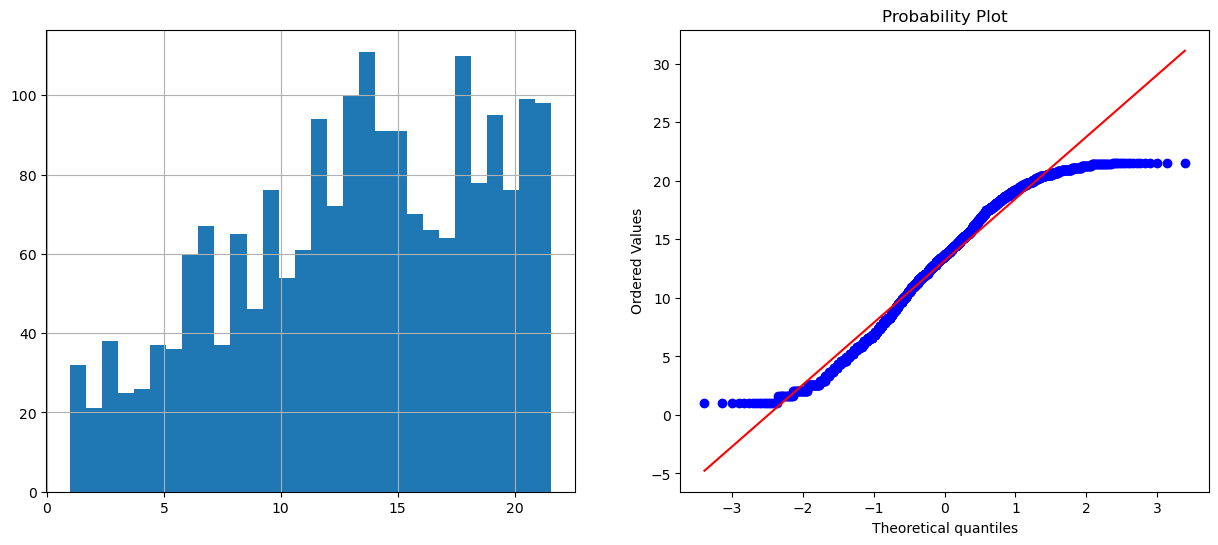

In [27]:
df['Spending Score (1-100)_exp1'] = df['Spending Score (1-100)']**(1/1.5)
diagnostic_plots(df, 'Spending Score (1-100)_exp1')

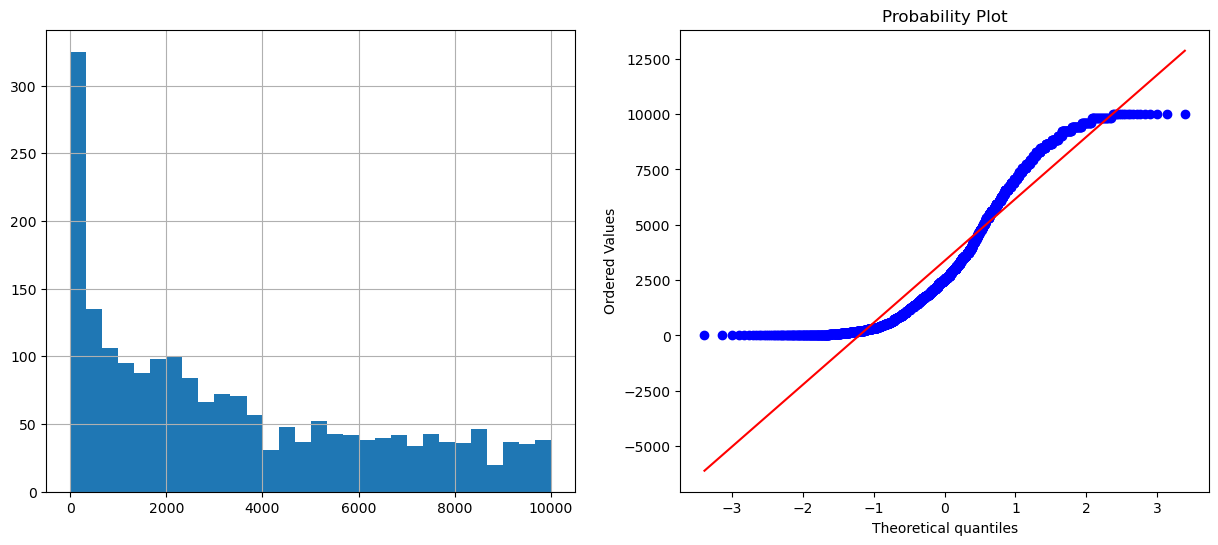

In [28]:
df['Spending Score (1-100)_exp2'] = df['Spending Score (1-100)']**(2)
diagnostic_plots(df, 'Spending Score (1-100)_exp2')

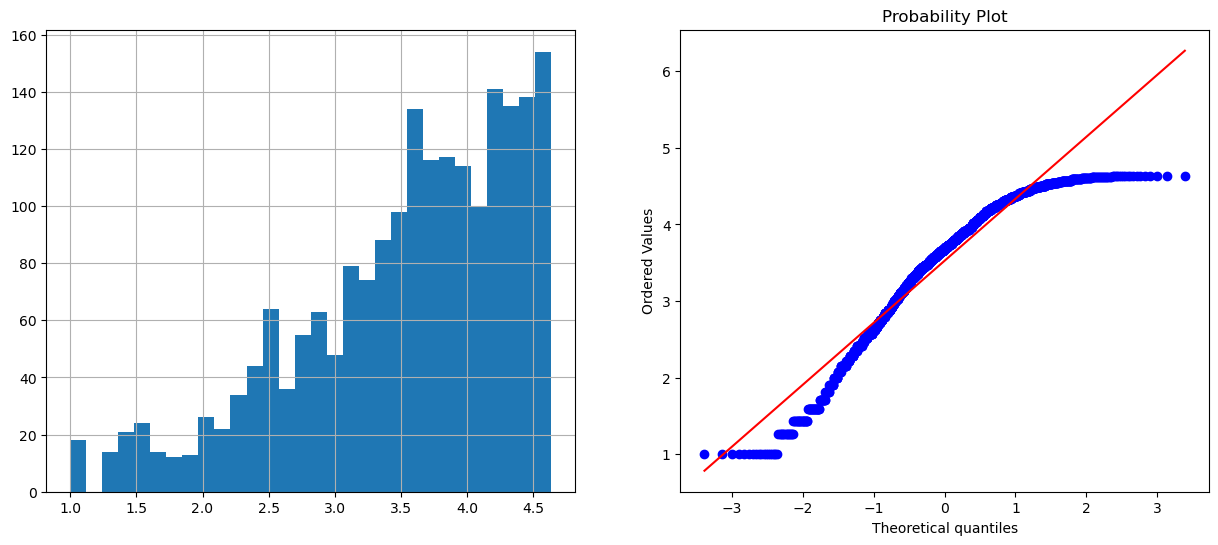

In [29]:
df['Spending Score (1-100)_exp3'] = df['Spending Score (1-100)']**(0.333)
diagnostic_plots(df, 'Spending Score (1-100)_exp3')

Оптимальное значение λ = 0.7498555325041829


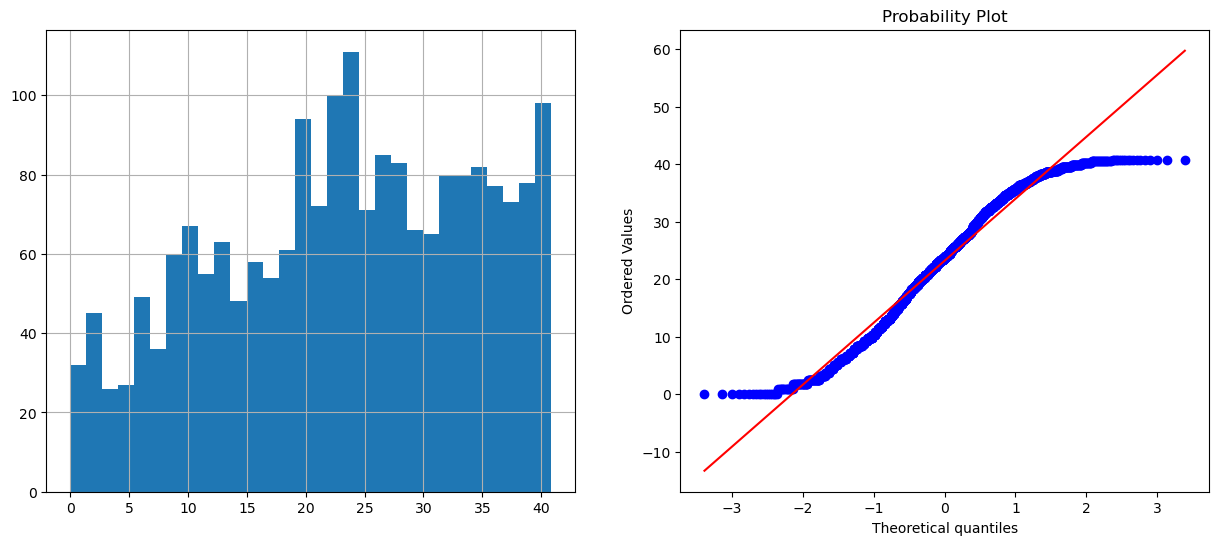

In [30]:
df['Spending Score (1-100)_boxcox'], param = stats.boxcox(df['Spending Score (1-100)']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(df, 'Spending Score (1-100)_boxcox')

Оптимальное значение λ = 0.7565367536857261


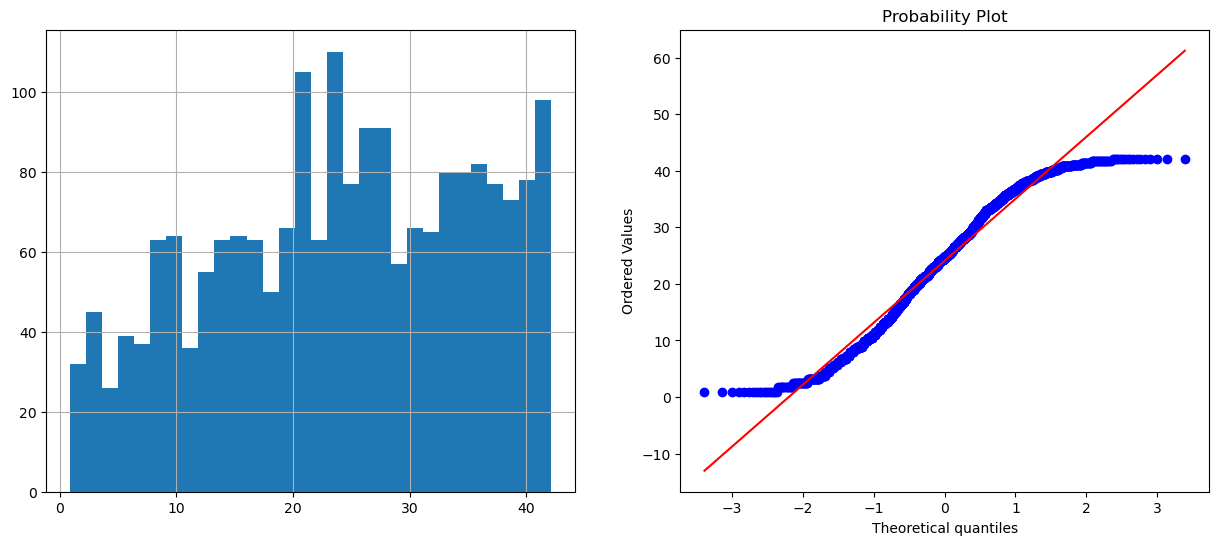

In [31]:
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].astype('float')
df['Spending Score (1-100)_yeojohnson'], param = stats.yeojohnson(df['Spending Score (1-100)']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(df, 'Spending Score (1-100)_yeojohnson')